[![University of Information Technology and Management in Rzeszow, Poland](https://gitlab.wsiz.pl/acousticlab/ml/-/raw/master/wsiz_eng.png)](wsiz_eng.png)

# Laboratory 3 Dimensionality reduction

[1] Chaitanyanarava. A Complete Guide On Dimensionality Reduction https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2

[2] Decomposing signal in components - matrix factorisation problems  (PCA, ICA, NMF). Scikit-learn useer guide. https://scikit-learn.org/stable/modules/decomposition.html

[3] LDA, QDA https://scikit-learn.org/stable/modules/lda_qda.html

[4] Feature Selection https://scikit-learn.org/stable/modules/feature_selection.html

[5] Manifold Learning (Visualisation, TSNE) https://scikit-learn.org/stable/modules/manifold.html

[5] https://github.com/ChaitanyaNarva/dimensionality-reduction-on-mnist    

[6] Mnist Dataset (preprocessed) https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download&select=mnist_train.csv - available in data/mnist_train.csv.zip

In [1]:
!unzip -o mnist_train.csv.zip


Archive:  mnist_train.csv.zip
  inflating: mnist_train.csv         


In [2]:
#Loading data

SyntaxError: invalid syntax (3624495514.py, line 1)

In [4]:
#source [2] data_preprocessing.py
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
#loading data

mnist= pd.read_csv("mnist_train.csv")
label=mnist["label"]
data=mnist.drop("label",axis=1)
data.shape

(60000, 784)

Radom datapoint

label of the image is 7


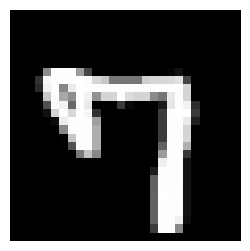

In [6]:
import random 

index=random.randint(0,data.shape[0])
print("label of the image is",label[index])
plt.figure(figsize=(3,3))
matrix=np.matrix(data.iloc[index]).reshape(28,28)   #reshaping 784 dimensions to 24*24 as an image format
plt.imshow(matrix,cmap='gray')
plt.axis('off')
plt.show()

In [7]:
scaler = StandardScaler().fit(data)
data=scaler.transform(data)
data.shape

(60000, 784)

In [8]:
from sklearn.decomposition import PCA

pca=PCA()
pca.n_components=2
pca_data=pca.fit_transform(data).T
print(pca_data.shape)

(2, 60000)


Creating dataframe of pca_data

(60000, 3)


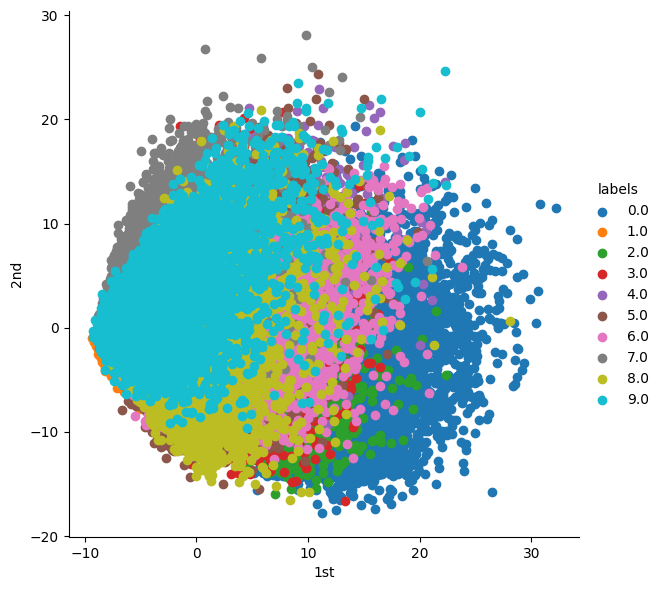

In [9]:
pca_new=np.vstack((pca_data,label)).T
print(pca_new.shape)
df=pd.DataFrame(data=pca_new,columns=["1st","2nd","labels"])
df.head(5)
sns.FacetGrid(df,hue="labels",height=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

Plotting the percentage of variance explained by each dimension:

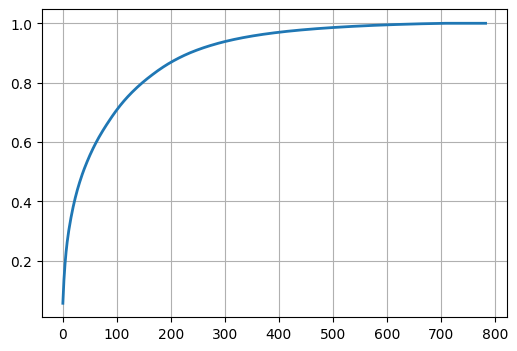

In [10]:
pca.n_components=784
pca_data=pca.fit_transform(data)
var_per=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_sum=np.cumsum(var_per)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_sum,linewidth=2)
plt.grid()
plt.show()

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA()
lda.n_components=2
lda_data=lda.fit_transform(data,label)
print(lda_data.shape)

(60000, 2)


Text(0.5, 1.0, 'LDA on MNIST')

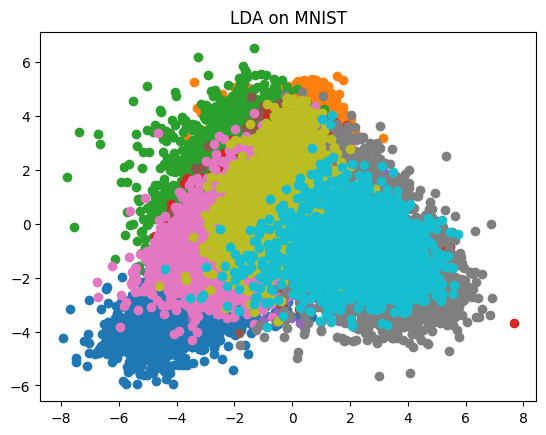

In [12]:
import matplotlib.colors as mcolors

for i,col in enumerate(mcolors.TABLEAU_COLORS):
    plt.scatter(lda_data[label==i, 0], lda_data[label==i, 1],color=col)
plt.title('LDA on MNIST')

(2, 1000)
1000


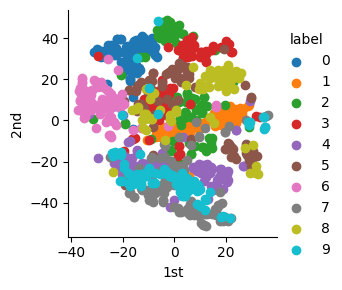

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = data[0:1000,:]   # data we generated in preprocessing step
labels_1000 = label[0:1000]

# Fitting T-SNE model to the mnist data with perplexity =30

tsne = TSNE(n_components=2, random_state=0) #perplexity=30 max_iter=1000 learning_rate=200
tsne_data = tsne.fit_transform(data_1000).T
print(tsne_data.shape)
print(len(labels_1000))

new_data = np.vstack((tsne_data,labels_1000)).T
tsne_df = pd.DataFrame(data=new_data, columns=("1st", "2nd","label"))
tsne_df['label']=labels_1000
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

/opt/tljh/user/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


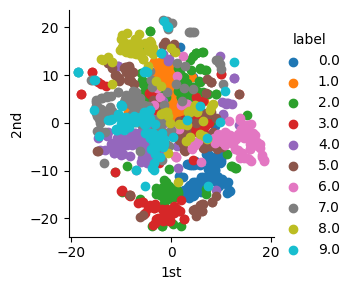

In [14]:
# Fitting T-SNE model to the mnist data with perplexity = 100 and n_iter = 1000

tsne=TSNE(n_components=2, random_state=0, perplexity=100, n_iter=1000, learning_rate=1000)
tsne_data=tsne.fit_transform(data_1000).T

tsne_data=np.vstack((tsne_data,labels_1000)).T
df=pd.DataFrame(data=tsne_data,columns=["1st","2nd","label"])

#plotting dataframe
sns.FacetGrid(df,hue="label").map(plt.scatter,"1st","2nd").add_legend()
plt.show()

1. Perform PCA or LDA dimensionality reduction for dataset from Laboratory 2-Exercise 3, then do Logistic Regression. Compare when no reduction were done.

2. Perform PCA or LDA dimensionality reduction for IRIS dataset `sklearn.datasets.load_iris()` then do Logistic Regression. Compare when no reduction were done.

3. Check two methods of Feature selection for any of above dataset

4. Find the parameters of t-SNE to see optimal clusters (for any of above dataset)

**For 70% pts :** do 2 exercises

**For 100% pts :** do 4 exercises


In [18]:
#Zad1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('data/insurance_us.csv')
X = df.iloc[:, :4]  
y = df.iloc[:, 4]   

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1000, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("🔹 BEZ REDUKCJI:")
print("R2 =", r2_score(y_test, y_pred))
print("MSE =", mean_squared_error(y_test, y_pred))


pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=1000, random_state=42)

lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)

print("\n🔹 Z PCA (2 składniki):")
print("R2 =", r2_score(y_test_pca, y_pred_pca))
print("MSE =", mean_squared_error(y_test_pca, y_pred_pca))


🔹 BEZ REDUKCJI:
R2 = 0.8794677294934431
MSE = 0.03

🔹 Z PCA (2 składniki):
R2 = 0.5942080226279249
MSE = 0.101


In [19]:
#Zad2

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, mean_squared_error


iris = load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("🔹 BEZ REDUKCJI:")
print("Accuracy =", accuracy_score(y_test, y_pred))
print("MSE =", mean_squared_error(y_test, y_pred))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

lr_pca = LogisticRegression(max_iter=200)
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)

print("\n🔹 Z PCA (2 składniki):")
print("Accuracy =", accuracy_score(y_test_pca, y_pred_pca))
print("MSE =", mean_squared_error(y_test_pca, y_pred_pca))




🔹 BEZ REDUKCJI:
Accuracy = 1.0
MSE = 0.0

🔹 Z PCA (2 składniki):
Accuracy = 0.9111111111111111
MSE = 0.08888888888888889


In [20]:
#Zad3

#First method

from sklearn.feature_selection import SelectKBest, f_classif


selector_kbest = SelectKBest(score_func=f_classif, k=2)
X_kbest = selector_kbest.fit_transform(X_scaled, y)

print("Wybrane cechy (SelectKBest):", selector_kbest.get_support())


X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(X_kbest, y, test_size=0.3, random_state=42)
lr_kbest = LogisticRegression(max_iter=200)
lr_kbest.fit(X_train_kbest, y_train_kbest)
print("Accuracy (SelectKBest):", accuracy_score(y_test_kbest, lr_kbest.predict(X_test_kbest)))



Wybrane cechy (SelectKBest): [False False  True  True]
Accuracy (SelectKBest): 1.0


In [21]:
#Second method

from sklearn.feature_selection import RFE


rfe = RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=2)
X_rfe = rfe.fit_transform(X_scaled, y)

print("Wybrane cechy (RFE):", rfe.get_support())

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.3, random_state=42)
lr_rfe = LogisticRegression(max_iter=200)
lr_rfe.fit(X_train_rfe, y_train_rfe)
print("Accuracy (RFE):", accuracy_score(y_test_rfe, lr_rfe.predict(X_test_rfe)))


Wybrane cechy (RFE): [False False  True  True]
Accuracy (RFE): 1.0


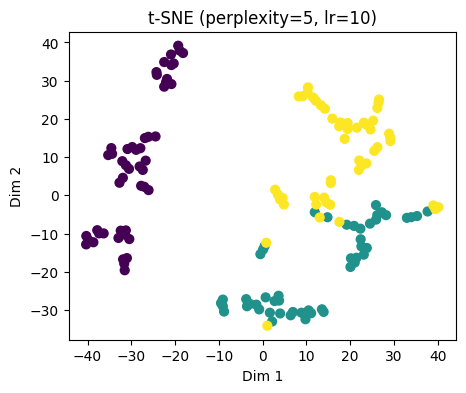

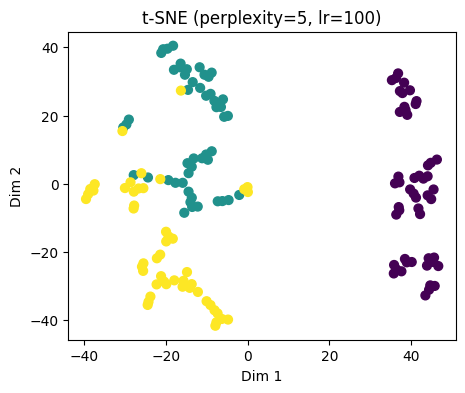

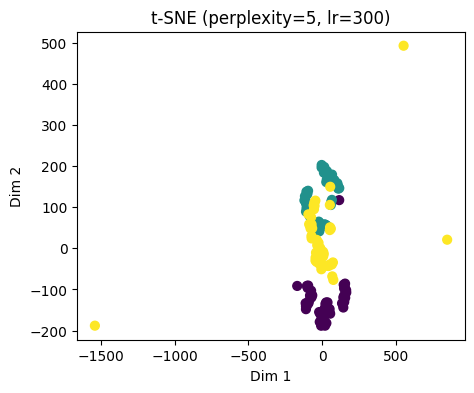

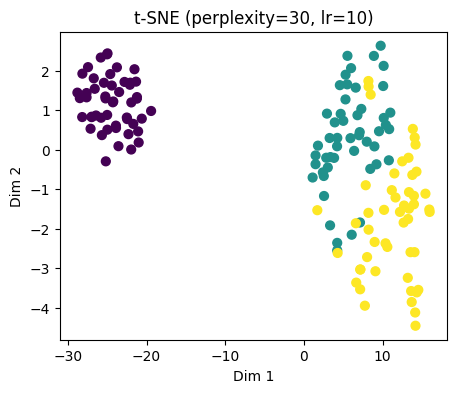

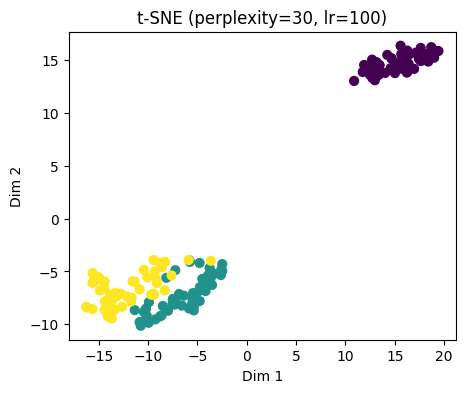

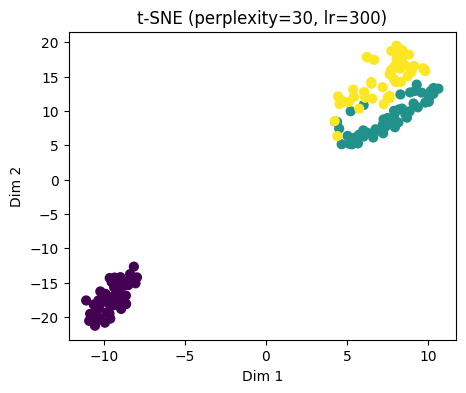

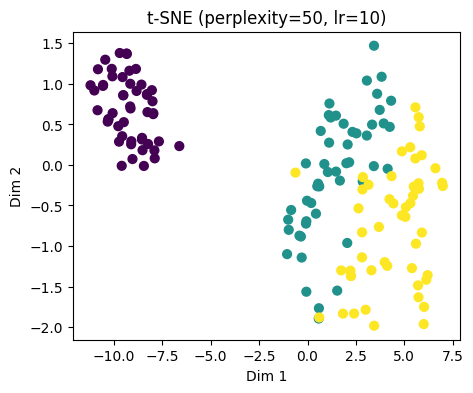

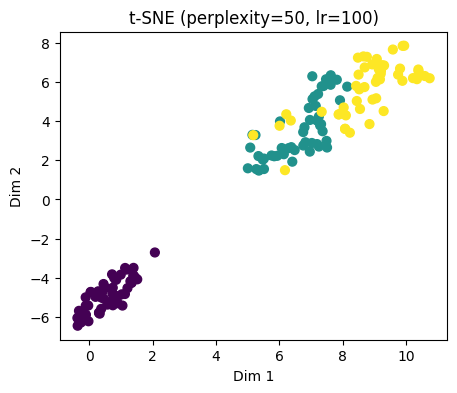

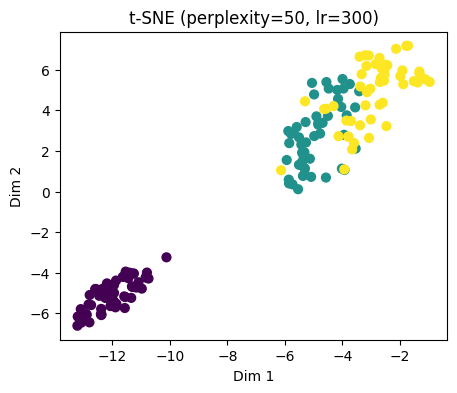

In [22]:
#Zad4

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


perplexities = [5, 30, 50]
learning_rates = [10, 100, 300]

for perp in perplexities:
    for lr in learning_rates:
        tsne = TSNE(n_components=2, perplexity=perp, learning_rate=lr, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        
        plt.figure(figsize=(5, 4))
        plt.title(f"t-SNE (perplexity={perp}, lr={lr})")
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=40)
        plt.xlabel("Dim 1")
        plt.ylabel("Dim 2")
        plt.show()
